<a href="https://colab.research.google.com/github/DSShail/Deep-Learning/blob/main/Dogs_vs_Cats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [13]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [14]:
import zipfile
zip_ref=zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [33]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten,BatchNormalization,Dropout

**Generators**

* It is used to process large amount of data.
* The images are loaded in batches and once those are processed they move out of memory and next batch of images enter

In [16]:
train_ds=keras.utils.image_dataset_from_directory(
    directory='/content/train',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 20000 files belonging to 2 classes.


In [17]:
validation_ds=keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(256,256)
)

Found 5000 files belonging to 2 classes.


**Normalization**

* The pixel value is between 0-255 so we need to normalize and bring the range between 0-1

In [18]:
def process(image,label):
  image=tf.cast(image/255. ,tf.float32)
  return image,label

train_ds=train_ds.map(process)
validation_ds=validation_ds.map(process)

# Create CNN model

* There are 896 trainable parameters in first convolution layer
  * filter size ((3,3,3)=27 parameters)- for one filter
  * no of filters = 32 that means 32 biases
  * 32 filters means 27*32=864 trainable parameters
  * total trainable parmaters for 1st conv. layers is 864+32(bias)=896

* There is no trainable parameters in pooling layer

# **This model is simple one without batch normalization and dropout layer**

In [56]:
model1=Sequential()

#adding convolution layer
model1.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))

#adding pooling layer
model1.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))



#adding convolution layer
model1.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

#adding pooling layer
model1.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))




#adding convolution layer
model1.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

#adding pooling layer
model1.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))


model1.add(Flatten())
model1.add(Dense(128,activation='relu'))

model1.add(Dense(128,activation='relu'))

model1.add(Dense(1,activation='sigmoid'))



In [57]:
model1.build()
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 62, 62, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 30, 30, 128)      

In [ ]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history=model1.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 72s 112ms/step - loss: 0.6277 - accuracy: 0.6417 - val_loss: 0.5513 - val_accuracy: 0.7140
Epoch 2/10
625/625 [==============================] - 56s 89ms/step - loss: 0.4736 - accuracy: 0.7713 - val_loss: 0.4439 - val_accuracy: 0.7890
Epoch 3/10
625/625 [==============================] - 53s 84ms/step - loss: 0.3535 - accuracy: 0.8407 - val_loss: 0.5302 - val_accuracy: 0.7932
Epoch 4/10
625/625 [==============================] - 54s 86ms/step - loss: 0.2107 - accuracy: 0.9115 - val_loss: 0.7049 - val_accuracy: 0.7848
Epoch 5/10
625/625 [==============================] - 56s 89ms/step - loss: 0.1085 - accuracy: 0.9571 - val_loss: 0.9350 - val_accuracy: 0.7852
Epoch 6/10
625/625 [==============================] - 55s 88ms/step - loss: 0.0774 - accuracy: 0.9718 - val_loss: 0.9783 - val_accuracy: 0.7926
Epoch 7/10
625/625 [==============================] - 56s 89ms/step - loss: 0.0505 - accuracy: 0.9826 - val_loss: 1.1063 - val_accuracy

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

# Model with Batch normalization and dropout layer

In [34]:
model=Sequential()

#adding convolution layer
model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
#adding pooling layer
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))



#adding convolution layer
model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
#adding pooling layer
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))




#adding convolution layer
model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
#adding pooling layer
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



In [35]:
model.build()
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_13 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 127, 127, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [36]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [37]:
history1=model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 74s 111ms/step - loss: 1.1473 - accuracy: 0.5458 - val_loss: 0.6839 - val_accuracy: 0.5168
Epoch 2/10
625/625 [==============================] - 67s 107ms/step - loss: 0.6751 - accuracy: 0.5728 - val_loss: 0.6391 - val_accuracy: 0.6062
Epoch 3/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6512 - accuracy: 0.6090 - val_loss: 0.6752 - val_accuracy: 0.5454
Epoch 4/10
625/625 [==============================] - 68s 108ms/step - loss: 0.6295 - accuracy: 0.6442 - val_loss: 0.6253 - val_accuracy: 0.6348
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.5912 - accuracy: 0.6926 - val_loss: 0.5942 - val_accuracy: 0.6908
Epoch 6/10
625/625 [==============================] - 68s 108ms/step - loss: 0.5573 - accuracy: 0.7217 - val_loss: 0.5623 - val_accuracy: 0.7450
Epoch 7/10
625/625 [==============================] - 65s 103ms/step - loss: 0.5256 - accuracy: 0.7470 - val_loss: 0.5428 - val_ac

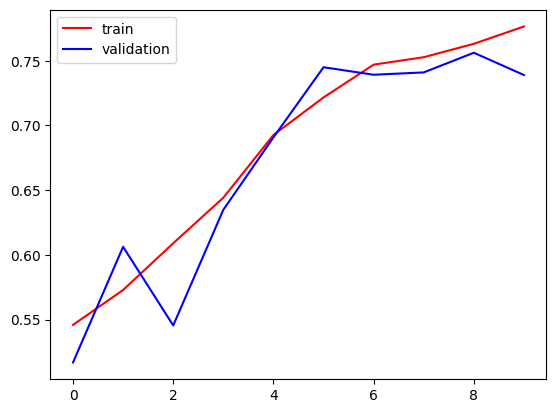

In [39]:
import matplotlib.pyplot as plt
plt.plot(history1.history['accuracy'],color='red',label='train')
plt.plot(history1.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

There is a gap between training and validation line- that means there is overfitting while training
* use more data for training
* data agumentation- for generating more data
* L1/L2 regularization
* Dropout
* Batch normalization
* Reduce Complexity

# Batch Normalization

In [38]:
#added batch normalization in the model and also  the dropout layer

# Predicition

In [40]:
import cv2

In [49]:
test_image_dog=cv2.imread('/content/dog.jpg')
test_image_cat=cv2.imread('/content/cat.jpg')

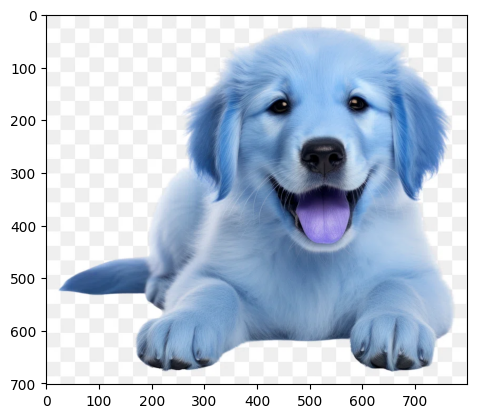

In [44]:
plt.imshow(test_image_dog)

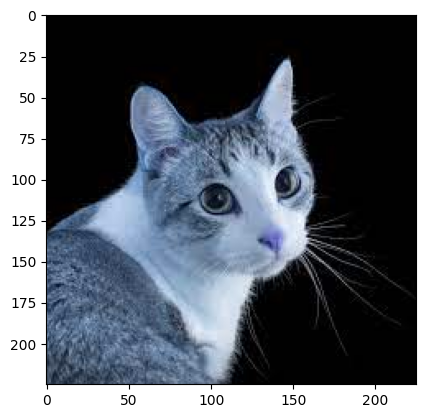

In [50]:
plt.imshow(test_image_cat)

In [45]:
test_image_dog.shape

(702, 800, 3)

In [51]:
test_image_dog=cv2.resize(test_image_dog,(256,256))
test_image_cat=cv2.resize(test_image_cat,(256,256))

In [52]:
test_input=test_image_dog.reshape((1,256,256,3))
test_input2=test_image_cat.reshape((1,256,256,3))

In [48]:
model.predict(test_input)

1/1 [==============================] - 1s 560ms/step


array([[0.2536177]], dtype=float32)

The model is able to predict an image is dog with 0.25 accuracy

In [53]:
model.predict(test_input2)

1/1 [==============================] - 0s 32ms/step


array([[1.]], dtype=float32)

the model is able to predict cat with accuracy of 1